In [3]:
import cv2
import keras


ModuleNotFoundError: No module named 'keras'

In [5]:
import os
from PIL import Image
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# import keras
# from keras.models import Sequential,Input,Model
# from keras.layers import Dense, Dropout, Flatten
# from keras.layers import Conv2D, MaxPooling2D
# from keras.layers.normalization import BatchNormalization
# from keras.layers.advanced_activations import LeakyReLU
import scipy.misc
from skimage import transform
import warnings

warnings.filterwarnings("ignore")

#convertering list of training data paths to df
train_dir = 'C:/Users/Administrator/Downloads/all/train/train/'
train_list = os.listdir(train_dir)
records = []
for category in train_list:
    img_list = os.listdir(train_dir + category)
    for img in img_list:
        records.append((img,category))
        
df_train = pd.DataFrame.from_records(records,columns=['image','category'])

print(df_train.head())



# #looking at the test data
# test_dir = '../input/test/'
# test_list = os.listdir(test_dir)
# print('Train Data', len(df_train.index))
# print('Test Data',type(test_list),len(test_list))
# print('categories',os.listdir(train_dir))
# print('# of categories', len(os.listdir(train_dir)))

           image     category
0  0050f38b3.png  Black-grass
1  0183fdf68.png  Black-grass
2  0260cffa8.png  Black-grass
3  05eedce4d.png  Black-grass
4  075d004bc.png  Black-grass


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


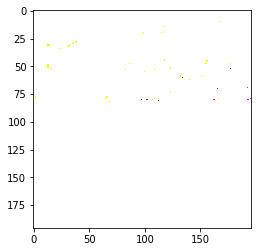

In [6]:
# Let's see what our images look like.
for i in list(df_train['image'])[0:1]:
    img = Image.open(train_dir + df_train['category'][0] + '/' + i)
    img.load()
    data = np.asarray(img, dtype="float32" )
    plt.imshow(data)
    plt.show()

In [ ]:
# First, we will normalize our images and remove any images that possibly aren't square. 
# Then we will create our X and y datasets.
dim_image = []
for i in (train_dir + df_train['category'] + '/' + df_train['image']):
    img = Image.open(i)
    data = img.size
    dim_image.append(data[0])
print('smallest image dimension', min(dim_image))

i_height = min(dim_image)
i_width = min(dim_image)

X = []
count = 0
bad_images = []
#df_train = df_train.drop(df_train.index[bad_images])
for i in (train_dir + df_train['category'] + '/' + df_train['image']):
    img = Image.open(i)
    img.load()
    img = np.asarray(img, dtype='float32')
    img = img/255
    data = transform.resize(img,(49,49))
    if data.size != 7203:
        bad_images.append(count)
#     plt.imshow(data)
#     plt.show()
#     X.append(data)
    count += 1
print('bad images',bad_images)

df_train = df_train.drop(df_train.index[bad_images])
for i in (train_dir + df_train['category'] + '/' + df_train['image']):
    img = Image.open(i)
    img.load()
    img = np.asarray(img, dtype='float32')
    img = img/255
    data = transform.resize(img,(49,49))
    X.append(data)

X = np.array(X)

y = np.array(df_train['category'].astype('category').cat.codes)

print('Done creating X and y.')
print('X Shape',X.shape)

In [ ]:
# Convolutional Neural Network
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

im_shape = (49,49,3)
batch_size = 10

cnn  = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='linear', input_shape=im_shape, padding='same'),
    LeakyReLU(alpha=0.1),
    MaxPooling2D((2,2), padding='same'),
    Conv2D(64, kernel_size=(3,3), activation='linear', padding='same'),
    LeakyReLU(alpha=0.1),
    MaxPooling2D((2,2), padding='same'),
    Conv2D(128, kernel_size=(3,3), activation='linear', padding='same'),
    LeakyReLU(alpha=0.1),
    MaxPooling2D((2,2), padding='same'),
    Flatten(),
    Dense(50,activation='relu'),
    Dense(12, activation='softmax')
])

cnn.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])

cnn. fit(X_train, y_train, batch_size=batch_size, epochs=10, verbose=1, validation_data=(X_test,y_test))

In [ ]:
# Accuracy 97%

import pandas as pd
import numpy as np
import os
import imageio

from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import Maximum
from keras.layers import ZeroPadding2D
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras import regularizers
from keras.layers import BatchNormalization
from keras.optimizers import Adam, SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.layers.advanced_activations import LeakyReLU
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from skimage.transform import resize as imresize
from tqdm import tqdm


from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))


BATCH_SIZE = 16
EPOCHS = 30
RANDOM_STATE = 11

CLASS = {
    'Black-grass': 0,
    'Charlock': 1,
    'Cleavers': 2,
    'Common Chickweed': 3,
    'Common wheat': 4,
    'Fat Hen': 5,
    'Loose Silky-bent': 6,
    'Maize': 7,
    'Scentless Mayweed': 8,
    'Shepherds Purse': 9,
    'Small-flowered Cranesbill': 10,
    'Sugar beet': 11
}

INV_CLASS = {
    0: 'Black-grass',
    1: 'Charlock',
    2: 'Cleavers',
    3: 'Common Chickweed',
    4: 'Common wheat',
    5: 'Fat Hen',
    6: 'Loose Silky-bent',
    7: 'Maize',
    8: 'Scentless Mayweed',
    9: 'Shepherds Purse',
    10: 'Small-flowered Cranesbill',
    11: 'Sugar beet'
}

# Dense layers set
def dense_set(inp_layer, n, activation, drop_rate=0.):
    dp = Dropout(drop_rate)(inp_layer)
    dns = Dense(n)(dp)
    bn = BatchNormalization(axis=-1)(dns)
    act = Activation(activation=activation)(bn)
    return act

# Conv. layers set
def conv_layer(feature_batch, feature_map, kernel_size=(3, 3),strides=(1,1), zp_flag=False):
    if zp_flag:
        zp = ZeroPadding2D((1,1))(feature_batch)
    else:
        zp = feature_batch
    conv = Conv2D(filters=feature_map, kernel_size=kernel_size, strides=strides)(zp)
    bn = BatchNormalization(axis=3)(conv)
    act = LeakyReLU(1/10)(bn)
    return act

# simple model 
def get_model():
    inp_img = Input(shape=(51, 51, 3))

    # 51
    conv1 = conv_layer(inp_img, 64, zp_flag=False)
    conv2 = conv_layer(conv1, 64, zp_flag=False)
    mp1 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(conv2)
    # 23
    conv3 = conv_layer(mp1, 128, zp_flag=False)
    conv4 = conv_layer(conv3, 128, zp_flag=False)
    mp2 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(conv4)
    # 9
    conv7 = conv_layer(mp2, 256, zp_flag=False)
    conv8 = conv_layer(conv7, 256, zp_flag=False)
    conv9 = conv_layer(conv8, 256, zp_flag=False)
    mp3 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(conv9)
    # 1
    # dense layers
    flt = Flatten()(mp3)
    ds1 = dense_set(flt, 128, activation='tanh')
    out = dense_set(ds1, 12, activation='softmax')

    model = Model(inputs=inp_img, outputs=out)
    
    # The first 50 epochs are used by Adam opt.
    # Then 30 epochs are used by SGD opt.
    
    #mypotim = Adam(lr=2 * 1e-3, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    mypotim = SGD(lr=1 * 1e-1, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy',
                   optimizer=mypotim,
                   metrics=['accuracy'])
    model.summary()
    return model


def get_callbacks(filepath, patience=5):
    lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=1e-5, patience=patience, verbose=1)
    msave = ModelCheckpoint(filepath, save_best_only=True)
    return [lr_reduce, msave]

# I trained model about 12h on GTX 950.
def train_model(img, target):
    callbacks = get_callbacks(filepath='model_weight_SGD.hdf5', patience=6)
    gmodel = get_model()
    gmodel.load_weights(filepath='model_weight_Adam.hdf5')
    x_train, x_valid, y_train, y_valid = train_test_split(
                                                        img,
                                                        target,
                                                        shuffle=True,
                                                        train_size=0.8,
                                                        random_state=RANDOM_STATE
                                                        )
    gen = ImageDataGenerator(
            rotation_range=360.,
            width_shift_range=0.3,
            height_shift_range=0.3,
            zoom_range=0.3,
            horizontal_flip=True,
            vertical_flip=True
    )
    gmodel.fit_generator(gen.flow(x_train, y_train,batch_size=BATCH_SIZE),
               steps_per_epoch=10*len(x_train)/BATCH_SIZE,
               epochs=EPOCHS,
               verbose=1,
               shuffle=True,
               validation_data=(x_valid, y_valid),
               callbacks=callbacks)

def test_model(img, label):
    gmodel = get_model()
    gmodel.load_weights(filepath='../input/plant-weight/model_weight_SGD.hdf5')
    prob = gmodel.predict(img, verbose=1)
    pred = prob.argmax(axis=-1)
    sub = pd.DataFrame({"file": label,
                         "species": [INV_CLASS[p] for p in pred]})
    sub.to_csv("sub.csv", index=False, header=True)

# Resize all image to 51x51 
def img_reshape(img):
    img = imresize(img, (51, 51, 3))
    return img

# get image tag
def img_label(path):
    return str(str(path.split('/')[-1]))

# get plant class on image
def img_class(path):
    return str(path.split('/')[-2])

# fill train and test dict
def fill_dict(paths, some_dict):
    text = ''
    if 'train' in paths[0]:
        text = 'Start fill train_dict'
    elif 'test' in paths[0]:
        text = 'Start fill test_dict'

    for p in tqdm(paths, ascii=True, ncols=85, desc=text):
        img = imageio.imread(p)
        img = img_reshape(img)
        some_dict['image'].append(img)
        some_dict['label'].append(img_label(p))
        if 'train' in paths[0]:
            some_dict['class'].append(img_class(p))

    return some_dict

# read image from dir. and fill train and test dict
def reader():
    file_ext = []
    train_path = []
    test_path = []

    for root, dirs, files in os.walk('../input'):
        if dirs != []:
            print('Root:\n'+str(root))
            print('Dirs:\n'+str(dirs))
        else:
            for f in files:
                ext = os.path.splitext(str(f))[1][1:]

                if ext not in file_ext:
                    file_ext.append(ext)

                if 'train' in root:
                    path = os.path.join(root, f)
                    train_path.append(path)
                elif 'test' in root:
                    path = os.path.join(root, f)
                    test_path.append(path)
    train_dict = {
        'image': [],
        'label': [],
        'class': []
    }
    test_dict = {
        'image': [],
        'label': []
    }

    #train_dict = fill_dict(train_path, train_dict)
    test_dict = fill_dict(test_path, test_dict)
    return train_dict, test_dict


In [ ]:
# I commented out some of the code for learning the model.
def main():
    train_dict, test_dict = reader()
    #X_train = np.array(train_dict['image'])
    #y_train = to_categorical(np.array([CLASS[l] for l in train_dict['class']]))

    X_test = np.array(test_dict['image'])
    label = test_dict['label']
    
    # I do not recommend trying to train the model on a kaggle.
    #train_model(X_train, y_train)
    test_model(X_test, label)

if __name__=='__main__':
    main()